In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('titanic_train.csv')

In [3]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
105,106,0,3,"Mionoff, Mr. Stoytcho",male,28.0,0,0,349207,7.8958,NaN,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
425,426,0,3,"Wiseman, Mr. Phillippe",male,NaN,0,0,A/4. 34244,7.2500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe

<bound method NDFrame.describe of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                 

# EDA


#### Missing Data 

In [6]:
#### Missing Data Identification
pd.isnull(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
pd.isnull(df).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
100*pd.isnull(df).sum()/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

# Missing Data Strategy
- Identify Missing Data
- Discard the columns having too much of missing data(>25%)
- Treat/Impute the missing entries
    - Try to fill fake entries which doesn't impact overall data
        - Fill using Mean Values (numericl data)
        - Fill using imouters (categorical data)
- Discard the rows having missing entries, if the missing entries are too less(<5%)

<AxesSubplot: >

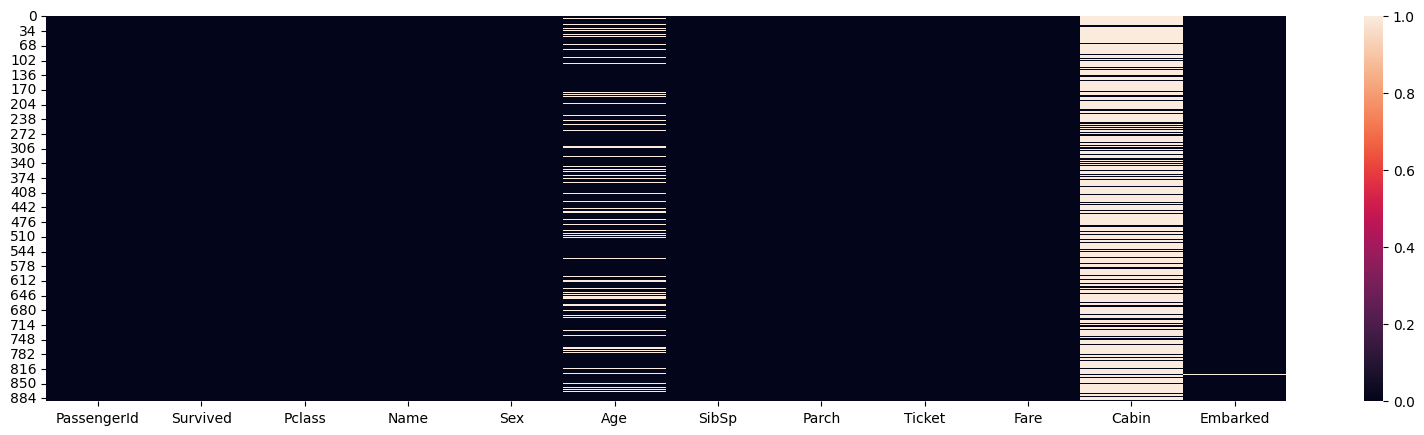

In [9]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.isnull(df))

In [10]:
df.drop('Cabin',axis=1,inplace=True)

In [11]:
sns.set_style('whitegrid')

<AxesSubplot: xlabel='Survived', ylabel='Age'>

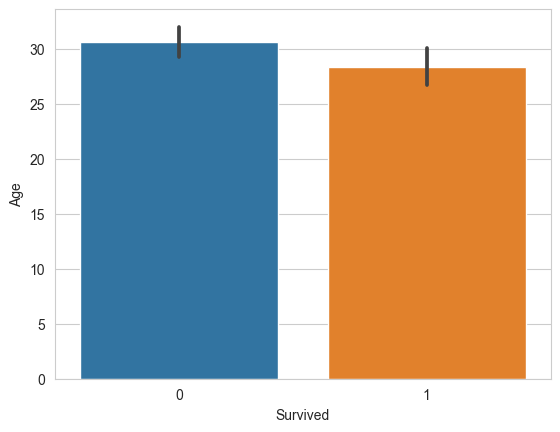

In [12]:
sns.barplot(data=df,x='Survived',y='Age')

In [13]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
df['Age'].mean()

29.69911764705882

In [15]:
df['Age'].fillna(df['Age'].mean()).mean()

29.69911764705882

In [16]:
df['Age'].fillna(0)

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     0.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [17]:
df['Age'].fillna(df['Age'].mean()).mean()

29.69911764705882

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

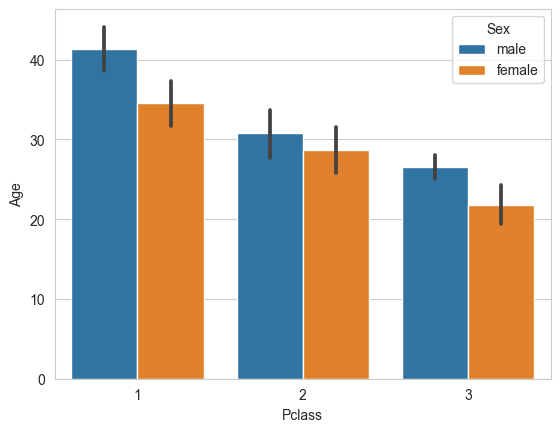

In [18]:
sns.barplot(data=df,y='Age',x='Pclass',hue='Sex')

In [19]:
target_cols=['Survived']
cat_cols=['Pclass','Sex','Embarked']
num_cols=['Age','SibSp','Parch','Fare']
drop_cols=['PassengerId','Name','Ticket','']

In [20]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [21]:
df['PassengerId'].nunique()

891

### Univariate Analysis

In [22]:
target_cols='Survived'
cat_cols=['Pclass','Sex','Embarked']
num_cols=['Age','SibSp','Parch','Fare']
drop_cols=['PassengerId','Name','Ticket']

In [23]:
def cat_analyze(col):
    print(col)
    print(df[col].value_counts().sort_index())
    sns.countplot(data=df,x=col)
    plt.show()

    for col in cat_cols:
        cat_analyze(col)

In [24]:
def num_analyze(col):
    print(col)
    print(df[col].value_counts())
    sns.distplot(df[col])
    plt.show()

    for col in cat_cols:
        num_analyze(col)

### Bivariate Analysis

Pclass
Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
Name: Pclass, dtype: int64


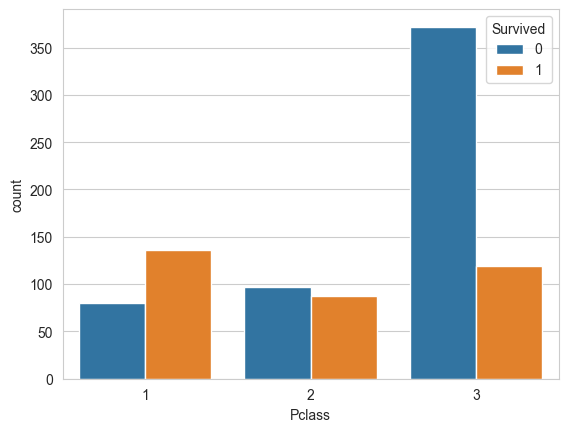

Sex
Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
Name: Sex, dtype: int64


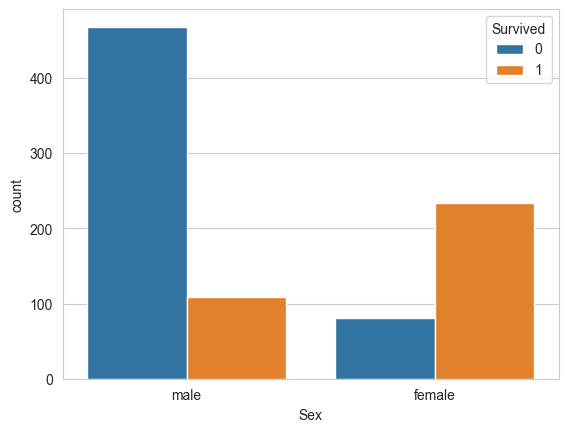

Embarked
Survived  Embarked
0         C            75
          Q            47
          S           427
1         C            93
          Q            30
          S           217
Name: Embarked, dtype: int64


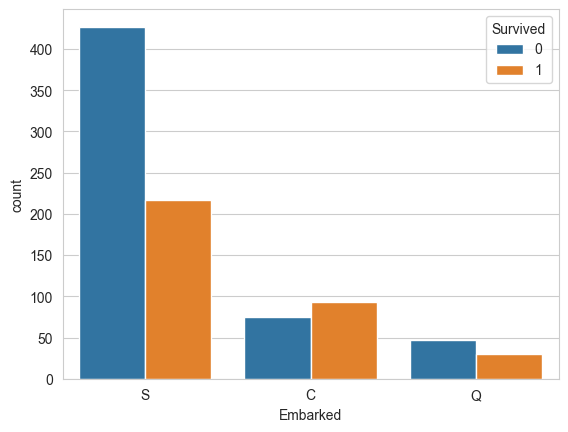

In [25]:
def cat_bivariate(col):
    print(col)
    print(df.groupby(target_cols)[col].value_counts().sort_index())
    sns.countplot(data=df,x=col,hue=target_cols)
    plt.show()

for col in cat_cols:
    cat_bivariate(col)

Pclass


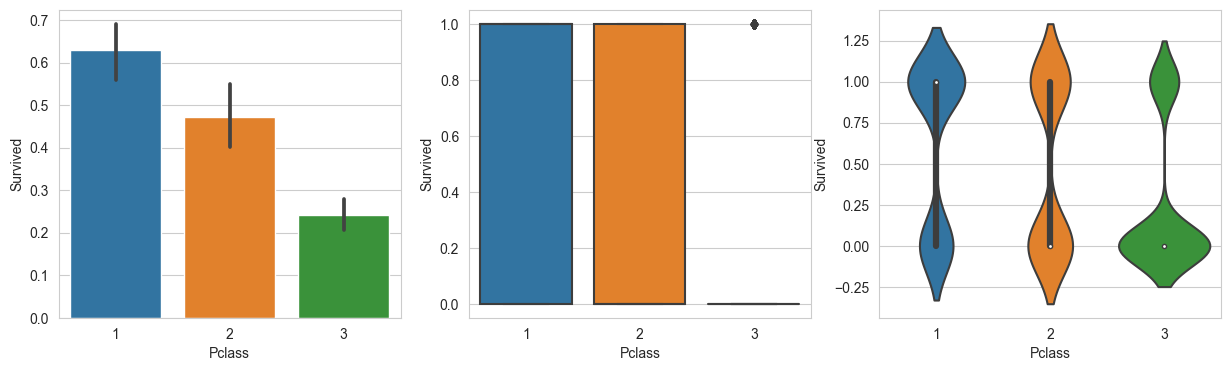

Sex


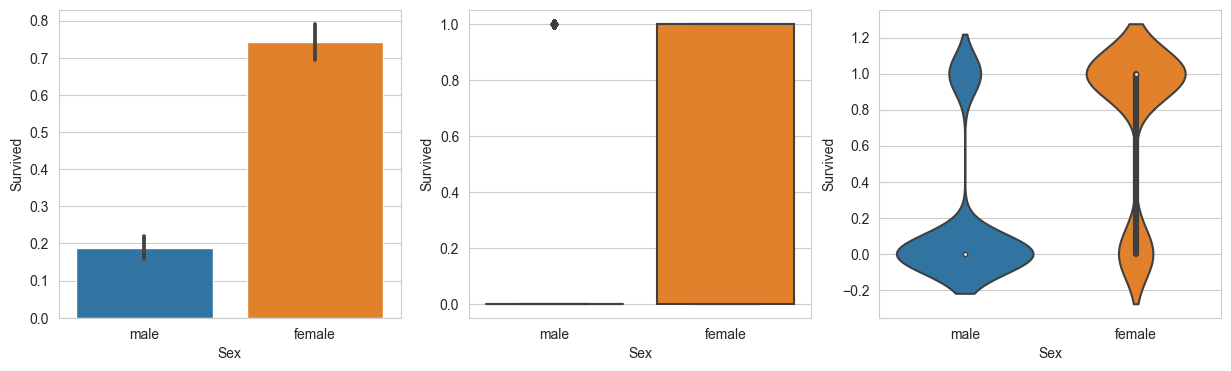

Embarked


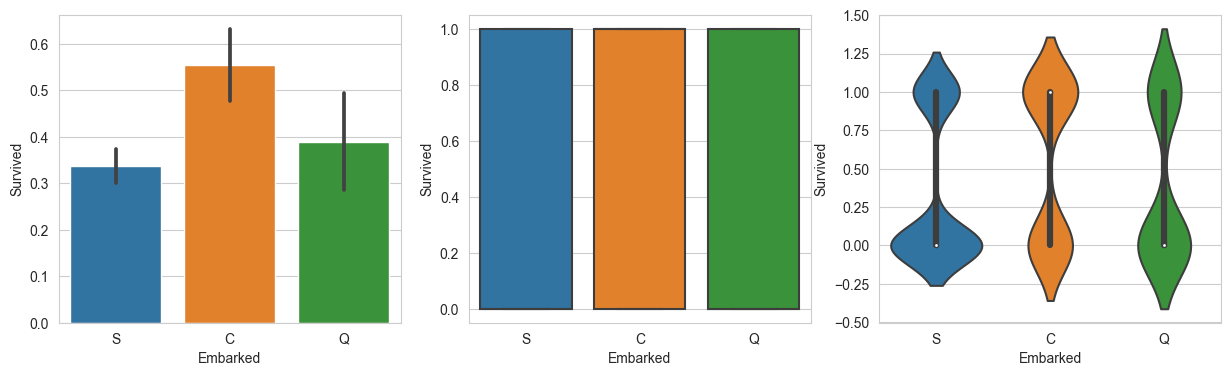

In [26]:
def num_bivariate(col):
    print(col)
    plt.figure(figsize=[15,4])
    plt.subplot(1,3,1)
    sns.barplot(data=df,y=target_cols,x=col)
    plt.subplot(1,3,2)
    sns.boxplot(data=df,y=target_cols,x=col)
    plt.subplot(1,3,3)
    sns.violinplot(data=df,y=target_cols,x=col)
    plt.show()

for col in cat_cols:
    num_bivariate(col)

<AxesSubplot: >

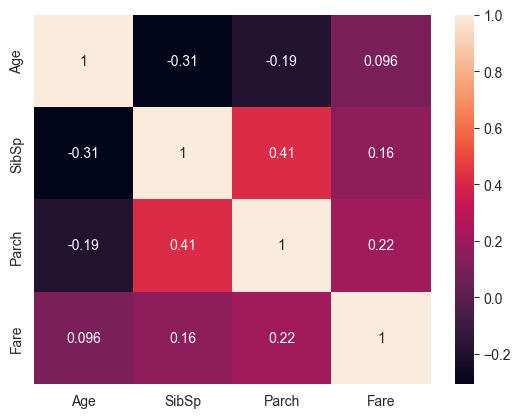

In [27]:
sns.heatmap(df[num_cols].corr(),annot=True)

### Mutivariate

In [28]:
from random import choice
plist=[]

In [ ]:
for col in cat_cols:
    if col==target_cols:
        continue
    for ncol in num_cols:
        plt.figure(fsize=(18,3))
        plt.suptitle(f'{col}vs{ncol}')
        plt.subplot(1,3,1)
        sns.boxplot(
            data=df,x=col,y=ncol,hue=target_cols,palette=choice(p_list)
        )
        plt.subplot(1,3,2)
        sns.violinplot(
            data=df,x=col,y=ncol,hue=target_cols,palette=choice(p_list)
        )
        plt.subplot(1,3,3)
        sns.barplot(
            data=df,x=col,y=ncol,hue=target_cols,palette=choice(p_list)
        )


<AxesSubplot: >

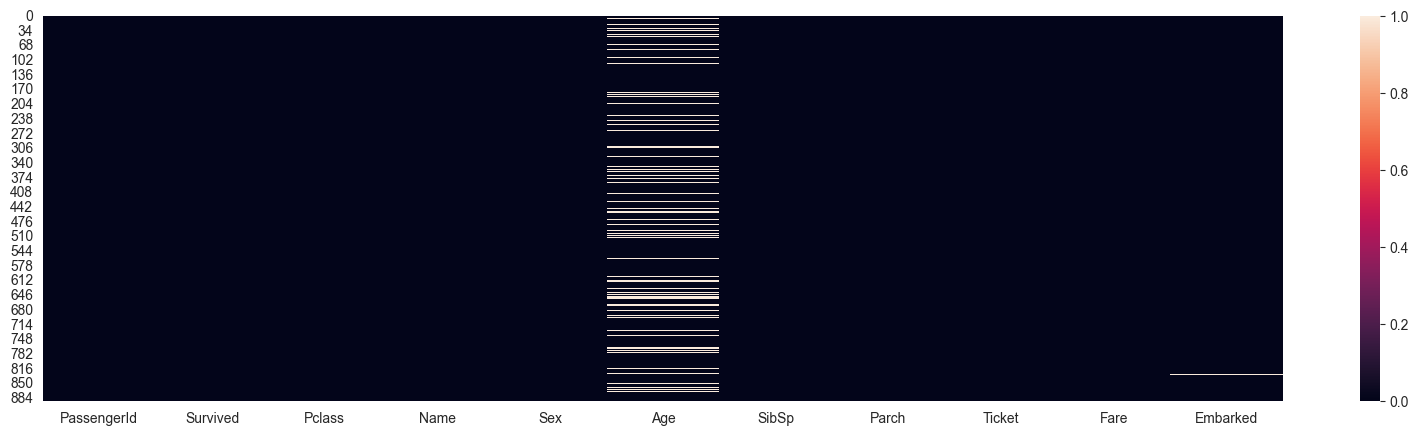

In [31]:
plt.figure(figsize=(20,5))
sns.heatmap(pd.isnull(df))

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [33]:
df.drop('Ticket',axis=1,inplace=True)

In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [35]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [36]:
df.drop('Name',axis=1,inplace=True)

In [37]:
df.drop('PassengerId',axis=1,inplace=True)

In [38]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [39]:
def age_imputer(data):
    age=data['Age']
    pclass=data['Pclass']
    sex=data['Sex']

    if pd.isnull(age):
        return df['Age'][(df['Pclass']==pclass)&(df['Sex']==sex)].mean()
    else:
        return age

df['Age']=df.apply(age_imputer,axis=1)

<AxesSubplot: >

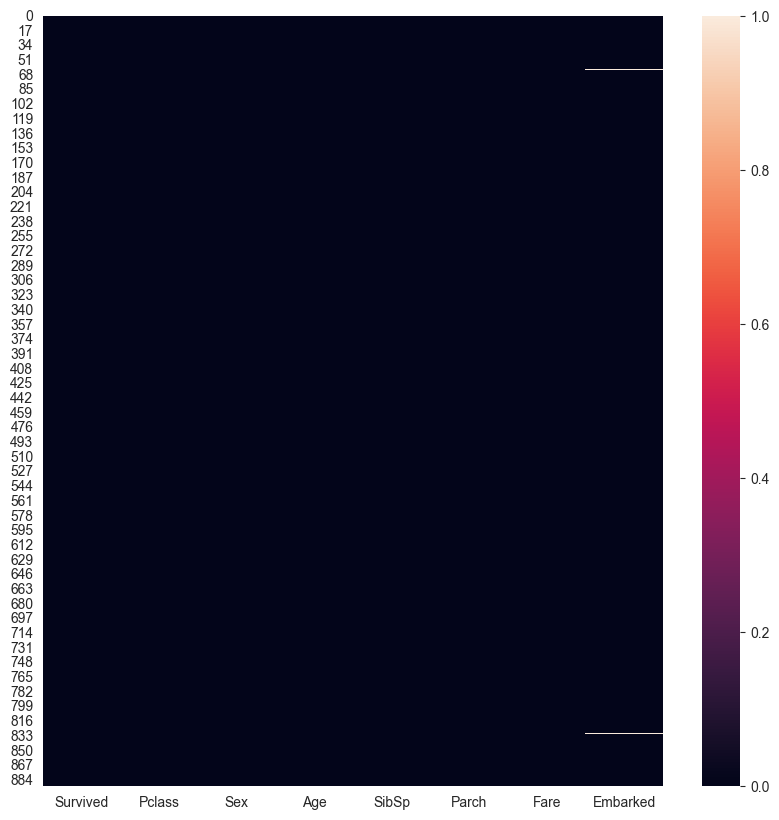

In [40]:
plt.figure(figsize=(10,10))
sns.heatmap(pd.isnull(df))

In [41]:
# Dropping missing entries which were were very less (in Embarked Column)
df.dropna(inplace=True)

In [ ]:
plt.

SyntaxError: invalid syntax (457645448.py, line 1)

In [42]:
100*pd.isnull(df).sum()/len(df)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

In [43]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


#### String Data Processing/ crating Dummy for String

In [44]:
data=pd.get_dummies(df).drop('Sex_female',axis=1)

In [45]:
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,0,1
1,1,1,38.0,1,0,71.2833,0,1,0,0
2,1,3,26.0,0,0,7.9250,0,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,0,1


In [46]:
target =data[target_cols]
features=data.drop(target_cols,axis=1)

In [47]:
target.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
features.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0
2,3,26.0,0,0,7.9250,0,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1
4,3,35.0,0,0,8.0500,1,0,0,1


In [49]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.25,random_state=101)

In [50]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [51]:
print(round(100*model.score(xtest,ytest)),'%')

83 %


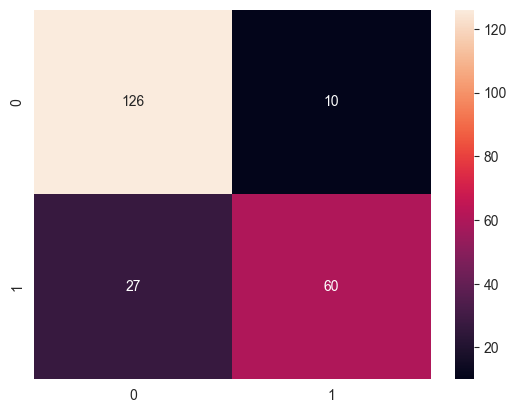

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       136
           1       0.86      0.69      0.76        87

    accuracy                           0.83       223
   macro avg       0.84      0.81      0.82       223
weighted avg       0.84      0.83      0.83       223



In [52]:
# Confusion Matrix and Classification Report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix,classification_report
ytest_pred=model.predict(xtest)
sns.heatmap(confusion_matrix(ytest,ytest_pred),annot=True,fmt='d')
plt.show()

print(classification_report(ytest,ytest_pred))


In [ ]:
df.info()